In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import sys
sys.path.append("../")

from python.model_check import ModelCheck

In [2]:
model_check = ModelCheck()

In [18]:
file_stem = "output/"
file_list = [file_stem+"fit_sim_numu_1000_catalog.h5",
             file_stem+"fit_sim_numu_9900_catalog.h5"]

model_check.load(file_list)

In [19]:
#fig, ax = model_check.compare()

In [20]:
plt.style.use("minimalist")

In [21]:
var_names

['F_diff', 'F_atmo', 'L', 'f', 'alpha']

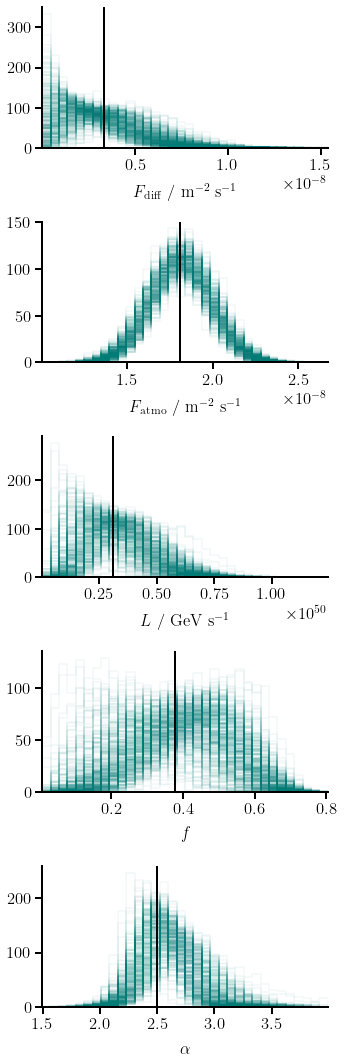

In [41]:
var_names = model_check._default_var_names
label_names = ["$F_\mathrm{diff}$ / $\mathrm{m}^{-2}~\mathrm{s}^{-1}$", 
               "$F_\mathrm{atmo}$ / $\mathrm{m}^{-2}~\mathrm{s}^{-1}$", 
               "$L$ / $\mathrm{GeV}~\mathrm{s}^{-1}$", "$f$", "$\\alpha$"]
N = len(var_names)
fig, ax = plt.subplots(N, figsize=(5, 15))

for v, var_name in enumerate(var_names):
    bins = np.linspace(np.min(model_check.results[var_name]),
                       np.max(model_check.results[var_name]), 35)
    for i in range(len(model_check.results[var_name])):
        ax[v].hist(
            model_check.results[var_name][i],
            color="#017B76",
            alpha=0.05,
            histtype="step", 
            bins=bins,
            lw=1.5
        )

    ax[v].axvline(model_check.truths[var_name], color="k", linestyle="-")
    ax[v].set_xlabel(label_names[v], labelpad=10)

fig.tight_layout()